Programming Assignment 2 -SQL for Data Science 
=======


### Instructions / Notes:

**_Read these carefully_**

* **IMPORTANT**: In your terminal run `pip install --user --upgrade ipython-sql`. This will install the necessary sql packages for Jupyter notebook.
* Run the cell below to load the database `assignment2.db` (make sure the actual database file, `assignment2.db`, is in the same directory as this IPython notebook is running in)
* Some of the problems involve _changing_ this database (e.g. deleting rows)- you can always re-download `assignment2.db` or make a copy if you want to start fresh!
* You **may** create new IPython notebook cells to use for e.g. testing, debugging, exploring, etc.- this is encouraged in fact!- **just make sure that your final answer for each question is _in its own cell_ and _clearly indicated_**
* When you see `In [*]:` to the left of the cell you are executing, this means that the code / query is _running_.
    * **If the cell is hanging- i.e. running for too long: To restart the SQL connection, you must restart the entire python kernel**
    * To restart kernel using the menu bar: "Kernel >> Restart >> Clear all outputs & restart"), then re-execute the sql connection cell at top
    * You will also need to restart the connection if you want to load a different version of the database file
* Remember:
    * `%sql [SQL]` is for _single line_ SQL queries
    * `%%sql [SQL]` is for _multi line_ SQL queries
* _Have fun!_

In [12]:
# Connect to the database.
%load_ext sql
%sql sqlite:///assignment2.db
import matplotlib.image as img
import matplotlib.pyplot as plt

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Problem 1: Matrix Manipulations
------------------------

Two random 3x3 ($N=3$) matrices have been provided in tables `A` and `B`, having the following schema:
> * `i INT`:   Row index
> * `j INT`:   Column index
> * `val INT`: Cell value

**Note: all of your answers below _must_ work for any _square_ matrix sizes, i.e. any value of $N$**.

Note how the matrices are represented- why do we choose this format?  Run the following queries to see the matrices in a nice format:

In [2]:
%sql SELECT group_concat(val, " , ") AS "A" FROM A GROUP BY i;

 * sqlite:///assignment2.db
Done.


A
"7 , 5 , 8"
"10 , 7 , 7"
"2 , 0 , 5"


In [3]:
%sql SELECT group_concat(val, " , ") AS "B" FROM B GROUP BY i;

 * sqlite:///assignment2.db
Done.


B
"9 , 6 , 10"
"7 , 6 , 9"
"1 , 1 , 7"


### Part (a): Elementwise multiplication [5 points]

We want the _elementwise multiply_ of matrices A and B. That is,
$(A\cdot B)_{ij} = A_{ij}B_{ij}$ for all $i,j$.

Write a _single SQL query_ that performs this operation (in the same format as $A$- output tuples should be of format `(i,j,val)` where `i` is row, `j` is column, and the output is ordered by row then column index)

Write your query here:

In [8]:
%%sql
select A.i, A.j, A.val*B.val as product
FROM A, B
WHERE A.i = B.i AND A.j = B.j

 * sqlite:///assignment2.db
Done.


i,j,product
0,0,63
0,1,30
0,2,80
1,0,70
1,1,42
1,2,63
2,0,2
2,1,0
2,2,35


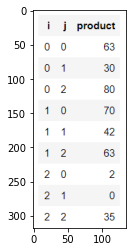

In [4]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""

plt.imshow(img.imread('solutions/p1a.png'))

### Part (b): Permutations [5 points]

A _permutation_ is a mapping from a set of integers to itself, i.e. $\pi:[n] \rightarrow [n]$, where $[n]$ denotes the set $\{0,\ldots, n-1\}$.

We write
$$
    \pi([a_1, a_2, \ldots, a_n]) 
    = [a_{\pi(1)},a_{\pi(2)}, \ldots a_{\pi(n)} ]
$$

The provided table $c$ contains a permutation on $[3]$.

In [5]:
%sql SELECT * FROM c;

 * sqlite:///assignment2.db
Done.


ind,pi
0,1
1,2
2,0


Write a _single SQL query_ that permutes the rows of matrix $A$ according to the permutation stored in $c$.

$$
(i,j,A_{ij}) \rightarrow (i,j,A_{\pi(i)j})
$$

For the example provided, this means a single-step cyclic upward shift, however your code needs to work for any input $A,c$ of the right dimensions.

Write your query here:

In [11]:
%%sql
SELECT c.pi, A.j, A.val
FROM A, c
WHERE A.i = c.ind
ORDER BY c.pi

 * sqlite:///assignment2.db
Done.


pi,j,val
0,0,2
0,1,0
0,2,5
1,0,7
1,1,5
1,2,8
2,0,10
2,1,7
2,2,7


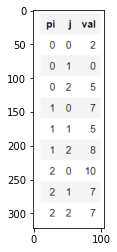

In [24]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p1b.png'))

### Part (c): Composability of permutations [8 points]

A known property of permutations, is that they are closed under composition. This implies that applying two permutations in succession is equivalent to applying a different, single permutation.
$$
    \pi_2(\pi_1([a_1, a_2, \ldots, a_n]))
    = [a_{\pi(1)},a_{\pi(2)}, \ldots a_{\pi(n)} ]
$$
where $\pi(i) = \pi_2(\pi_1(i))$.

Write a _single SQL query_ that applies the permuation in table $c$ twice on the rows of matrix $A$.

$$
(i,j,A_{ij}) \rightarrow (i,j,A_{\pi(\pi(i))j})
$$

For the example provided, this means a two-step cyclic upward shift, however your code needs to work for any input $A,c$ of the right dimensions.

Write your query here:

In [14]:
%%sql
SELECT ci.pi, A.j, A.val
FROM A, c, c as ci
WHERE A.i = c.ind 
AND c.pi = ci.ind
ORDER BY ci.pi

 * sqlite:///assignment2.db
Done.


pi,j,val
0,0,10
0,1,7
0,2,7
1,0,2
1,1,0
1,2,5
2,0,7
2,1,5
2,2,8


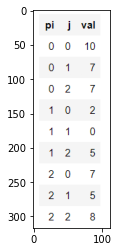

In [23]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p1c.png'))

### Part (d): Local maximum [12 points]

Consider the _local maximum_ matrix function, 
$MAX:\mathbb{R}^{n,n} \rightarrow \mathbb{R}^{n,n}$:

$$
    MAX(A)_{ij} = \max \{ A_{ij} \textrm{ and cells up, down, left, right }\}
$$

that is, if

$$A=\begin{bmatrix}a & b & c\\ d & e & f\\ g & h & i\end{bmatrix}$$

then

$$
    MAX(A)_{00} = \max \{ a,b,d \},
$$

$$
    MAX(A)_{01} = \max \{ a,d,g,e \},
$$

and

$$
    MAX(A)_{11} = \max \{ d,b,e,h,f \}.
$$

Write a _single SQL query_ that computes the local maximum of matrix $A$.

Write your query here:

In [41]:
%%sql
SELECT A.i, A.j, max(A_2.val) as local_max
FROM A, A as A_2
WHERE (A.i = A_2.i
        AND (A.j = A_2.j
             OR A.j = A_2.j-1
             OR A.j = A_2.j+1))
    OR (A.j = A_2.j
        AND (A.i = A_2.i 
             OR A.i = A_2.i-1
             OR A.i = A_2.i+1))
GROUP BY A.i, A.j

 * sqlite:///assignment2.db
Done.


i,j,local_max
0,0,10
0,1,8
0,2,8
1,0,10
1,1,10
1,2,8
2,0,10
2,1,7
2,2,7


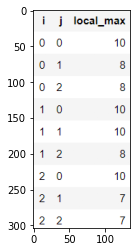

In [25]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""

plt.imshow(img.imread('solutions/p1d.png'))

Problem 2: U.S. Sustainable Energy Sources
----------------------------------------------

We've prepared and loaded a public dataset from the US DOE (Department of Energy) of sustainable energy production in MWh (megawatt hours, i.e., 1000 [kilowatt hours](https://en.wikipedia.org/wiki/Kilowatt_hour)). This data is from 2009, the latest year available.  The data includes each state, the region of the United States it is in, and its production in MWh of sustainable energy by source (solar, wind, hydroelectric, and nuclear). The table `energy` has the following schema:
```
TABLE energy (
    state varchar(30),
    region varchar(30),
    solar float,
    wind float,
    hydro float,
    nuclear float)
```

In [26]:
%sql SELECT * FROM energy LIMIT 3;

 * sqlite:///assignment2.db
Done.


state,region,solar,wind,hydro,nuclear
Alabama,Southeast,0.0,0.0,11753493.37,39716204.0
Alaska,Alaska,0.0,3062.442,1204550.392,0.0
Arizona,West,13759.445,9555.0,6348462.992,30661851.0


### Part (a): Regional Champions [10 points]

Using a _single SQL query_, find all of the regions in the United States with a state in it that is the leading producer of one of the four types of energy (solar, wind, hydro, and nuclear), and return the counts of how many state winners they had in descending order. **Do not include any regions with no state winners.**

Further requirements:
* Use `GROUP BY`
* Write the shortest possible SQL query to accomplish this
* Return relation `(region, num_state_winners)`

Write your query here:

In [44]:
%%sql
SELECT region, count(state) as num_state_winners
FROM energy,
     (SELECT max(solar) as solar_max,
             max(wind) as wind_max,
             max(hydro) as hydro_max,
             max(nuclear) as nuclear_max
      FROM energy) as energy_leading
WHERE energy.solar = energy_leading.solar_max
OR energy.wind = energy_leading.wind_max
OR energy.hydro = energy_leading.hydro_max
OR energy.nuclear = energy_leading.nuclear_max
GROUP BY region
ORDER BY num_state_winners DESC

 * sqlite:///assignment2.db
Done.


region,num_state_winners
West,2
Southeast,1
Midwest,1


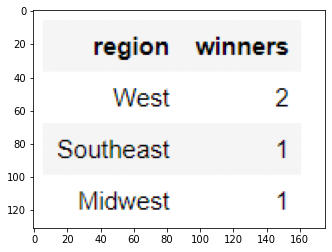

In [26]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p2a.png'))

### Part (b): Pareto Frontiers [10 points]

Solar power and wind power [tend to be complementary](https://en.wikipedia.org/wiki/Wind_power#Variability), since it tends to be less windy when there are few clouds and the sun can best reach solar panels.

Our goal in this part is to identify states that strike the best balance between solar and wind energy production. Here we define a state as "best" if it exists on the [Pareto frontier](https://en.wikipedia.org/wiki/Pareto_efficiency#Formal_representation) of solar and wind energy production. In other words, a state is Pareto optimal if no other state produces **both more solar and more wind energy**, and the Pareto frontier is the set of states that are Pareto optimal.

Write a query that returns the entire Pareto frontier. Results should be triples of the form `(state, solar, wind)`, where `state` is the name of the state in the frotier, and `solar` and `wind` are its solar and wind energy production in MWh. Order the results in descending order by sum total of solar and wind energy production in MWh.

Write your query here:

In [66]:
%%sql
SELECT energy.state, energy.solar, energy.wind, (energy.solar + energy.wind) as su
FROM energy
WHERE NOT EXISTS(SELECT * FROM energy as energy_2
                WHERE energy_2.solar > energy.solar
                AND energy_2.wind > energy.wind
                AND energy_2.solar+energy_2.wind > energy.solar+energy.wind)
ORDER BY su DESC

 * sqlite:///assignment2.db
Done.


state,solar,wind,su
Texas,0.0,19367238.86,19367238.86
Iowa,0.0,7331390.872,7331390.872
California,611763.387,5764637.309,6376400.696


In [67]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p2b.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'solutions/p2b.png'

Problem 3: Classification
--------------------------------------------------

SQL is a very [expressive language](http://wiki.postgresql.org/wiki/Mandelbrot_set) (some SQL extensions are known to be [Turing complete](http://stackoverflow.com/questions/900055/is-sql-or-even-tsql-turing-complete/7580013#7580013)). Here, we go through the steps of using it for a simple machine learning task: _binary classification_.

We will use a subset of the [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset. The reduced dataset included here as table IRIS, is comprised of $100$ samples with features SepalLength, SepalWidth, PetalLength, PetalWidth and labels 0 (identifying the species Iris-setosa) and 1 (the species Iris-versicolor). Samples of the third class (Iris-virginica) present in the original dataset have been dropped for this exercise.

In [68]:
%sql SELECT * FROM IRIS LIMIT 5;

 * sqlite:///assignment2.db
Done.


i,SepalLength,SepalWidth,PetalLength,PetalWidth,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model**

We will use a simple _linear model_ to predict the label (species) given the four features included in the dataset.
An unlabeled sample $x_i \in \mathbb{R}^4$ is a vector the four given feature values. For example, the first sample in our dataset is $x_0=[5.1, 3.5, 1.4, 0.2]^\top$.
This model, known as the [Perceptron](https://en.wikipedia.org/wiki/Perceptron), is also represented as a four-dimensional vector $w \in \mathbb{R}^4$. Given sample $x_i$ and model $w$ the perceptron makes the following prediction $\hat{y}_i$ for the true label, $y_i$ of sample $x_i$:
$$
    \hat{y}_i={\begin{cases}1&{\text{if }} x_i^\top w >0\\0&{\text{otherwise}}\end{cases}}
$$

A pre-trained model, $w$, is included in table MODEL.

In [69]:
%sql SELECT * FROM MODEL;

 * sqlite:///assignment2.db
Done.


j,val
0,0.35260621
1,-0.90142873
2,0.59729474
3,1.30194557


### Part (a): Matrix-vector multiplication [15 points]

If we consider the _feature matrix_, $X$, whose $i$-th row is $x_i^\top$, the prediction rule for all samples becomes:
$$
    \hat{y}= \mathrm{step}(X w)
$$
where $Xw$ is a matrix-vector multiplication and
$$
    \mathrm{step}(z)_i={\begin{cases}1&{\text{if }} z_i >0\\0&{\text{otherwise}}\end{cases}}.
$$
The final product, $\hat{y} \in \{0,1\}^n$ is a vector with the predictions for all samples.

The product of a matrix $X$ (having dimensions $n\times m$) and a vector $w$ (having dimensions $m\times 1$) is the vector $c$ (of dimension $n\times 1$) having cell at row $i$ and column $j$ equal to:

$$c_{i} = \sum_{j=1}^m X_{ij}w_{j}$$

In other words, to do matrix-vector multiplication, get each cell of the resulting vector $c$, $c_{i}$, by taking the _dot product_ of the $i$th row of $X$ and the $w$.

We start by preprocessing IRIS to create the $X$ feature matrix, using the following schema:

> * `i INT`:   Row index
> * `j INT`:   Column index
> * `val INT`: Cell value

In order to streamline the work in this section we will make use of views. A view is a virtual table based on the output set of a SQL query. A view can be used just like a normal table; the only difference under the hood is that the DBMS re-evaluates the query used to generate it each time a view is queried by a user (thus the data is always up-to date!)

In [70]:
%%sql
DROP VIEW IF EXISTS X;
CREATE VIEW X AS
SELECT i, 0 as j, SepalLength as val
FROM IRIS
UNION
SELECT i, 1 as j, SepalWidth as val
FROM IRIS
UNION
SELECT i, 2 as j, PetalLength as val
FROM IRIS
UNION
SELECT i, 3 as j, PetalWidth as val
FROM IRIS;

 * sqlite:///assignment2.db
Done.
Done.


[]

In [71]:
%sql SELECT * FROM X LIMIT 5;

 * sqlite:///assignment2.db
Done.


i,j,val
0,0,5.1
0,1,3.5
0,2,1.4
0,3,0.2
1,0,4.9


Write a single SQL statement that implements the matrix-vector multiply $Xw$ between the provided view $X$ and model $w$ from table MODEL. Return the first 5 tuples as your answer.

Write your query here:

In [74]:
%%sql
SELECT X.i, sum(X.val*Model.val) as prod
FROM X, Model
WHERE X.j = Model.J
GROUP BY X.i
LIMIT 5

 * sqlite:///assignment2.db
Done.


i,prod
0,-0.26010713400000024
1,0.12008598900000017
2,-0.19045047300000034
3,-0.016109273000000146
4,-0.38551062799999997


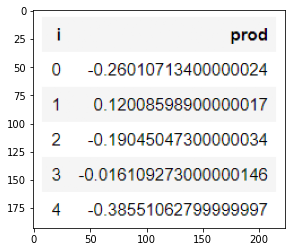

In [31]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p3a.png'))

### Part (b): Predict labels [15 points]

Now we can predict the labels using the following rule:
$$
    \hat{y}= \mathrm{step}(X w)
$$

Create a view named 'PREDICTION' that will produce tuples of sample IDs and label predictions, i.e. $(i,\hat{y}_i)$.

**Not sure you got the previous question right?**
The provided view 'ANSWER_P3a' with schema $(i,(Xw)_i)$ has the right answer. You can use it in your solution here for full credit in this question. **Warning**: Using this view in Part (a) is against the rules.

Write your query in the following cell:

In [79]:
%%sql
DROP VIEW IF EXISTS prediction;

CREATE VIEW prediction AS
SELECT X.i, (sum(X.val*Model.val)>= 0) as val
FROM X, Model
WHERE X.j = Model.J
GROUP BY X.i;


 * sqlite:///assignment2.db
Done.
Done.


[]

To help you test, below is the expected output of a query for the first five records in the view:

In [80]:
%sql SELECT * FROM PREDICTION LIMIT 5;

 * sqlite:///assignment2.db
Done.


i,val
0,0
1,1
2,0
3,0
4,0


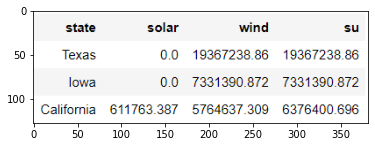

In [28]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p3b.png'))

### Part (c): Evaluate accuracy [20 points]

Given the predicted labels $\hat{y}_i$ and true labels $y_i$ we evaluate the predictive power of our model using _accuracy_: the fraction of labels our model got right.
$$
    \mathrm{accuracy} 
    = \frac{1}{n}\sum_{i=1}^n \mathbb{I}[y_i = \hat{y}_i]
$$

Using the 'PREDICTION' view from the previous part should make for a simpler solution.

**Not sure you got the previous question right?**
The provided view 'ANSWER_P3b' with schema $(i,\hat{y}_i)$ has the right answer. You can use it in your solution here for full credit in this question. **Warning**: Using this view in Part (b) is against the rules.

Write your query here:

In [104]:
%%sql
SELECT CAST(sum(prediction.val==IRIS.label) AS FLOAT)/count(*) as accuracy
FROM prediction, IRIS
WHERE prediction.i = IRIS.i

 * sqlite:///assignment2.db
Done.


accuracy
0.87


Our pre-trained classifer achieved a classification accuracy of 87%. If you don't think this is good enough, you are correct. This is not an optimally trained model. Try the bonus question to see how this classification performance can be improved!

### Bonus Problem 1: Classification, Pt. II

A simple procedure from training the model $w$ given labeled data, is as follows.
$$
    w' = w + 0.0001 \sum_{i=1}^n (y_i-\hat{y_i})x_i
$$
This kind of optimization algorithm is typically applied iteratively, but here we will just run a single step. 

Run a SQL statement that computes the new model value, $w'$, based on the original model $w$ in MODEL and the samples $x_i$ in IRIS. 

**Using answers from previous parts.**
As before, you should feel free to use the provided views 'ANSWER_P3a' and 'ANSWER_P3b' described in parts (b) and (c) in your solution for full credit in this question. **Warning**: Using these views in Parts (a) and (b) respectively is against the rules.

Write your answer here:

In [ ]:
%%sql
SELECT 0.0001 * (IRIS.label - prediction.val)
FROM IRIS, prediction
WHERE IRIS.i = prediction.i


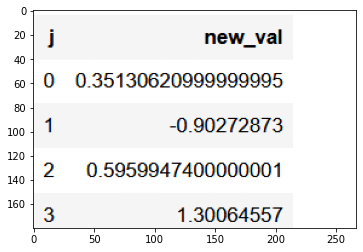

In [30]:
"""
Expected output below- don't re-evaluate this cell!

NOTE: A valid answer must work for ALL inputs of the given type,
not just this example.  I.e. do not hardcode around this answer / etc!
"""
plt.imshow(img.imread('solutions/p3_bonus.png'))

We have a new model now. If you perform the evaluation process for this new model, you should find that accuracy has increased to 90%. Not bad for a single step of the algorithm! Further iterations will improve this performance more.